<a href="https://colab.research.google.com/github/sofiaborgato/Bioinformatic_project/blob/main/CNN_gene_aligned_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/sofiaborgato/Bioinformatic_project.git'
import tarfile
import os
import sys
import os
import numpy as np
import string
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Cloning into 'Bioinformatic_project'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 58 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [2]:

# open file
file = tarfile.open('./Bioinformatic_project/data_local_concat.tar.xz') 
# extracting file
file.extractall('./')
  
# file.close()
# path='./Bioinformatic_project'
# for file_name in os.listdir(path):
#   print(file_name)


In [ ]:
import pandas as pd
import numpy as np


In [5]:
data=pd.read_csv('./data_local_concat/local_aligned _complete.csv')


In [7]:
data.drop('Full sequence',axis='columns',inplace=True)


In [8]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('label')
  print(dataframe.head())
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2,shuffle=True,stratify=data['label'])
train, val = train_test_split(train, test_size=0.2,shuffle=True,stratify=train['label'])

In [18]:
batch_size = 30
train_ds = df_to_dataset(train, shuffle = False, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
feature_columns = []
n_features = 1000

indicator_column_names = data.columns.drop('label')


for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, data[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)
batch_size = 30
train_ds = df_to_dataset(train, shuffle = False, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


                                                 ORF1ab  ...                                              ORF10
2315  ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...  ...  ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...
2844  ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...  ...  ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...
2668  ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...  ...  ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...
3786  ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...  ...  ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...
2031  ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...  ...  ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...

[5 rows x 11 columns]
                                                 ORF1ab  ...                                              ORF10
480   ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...  ...  ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...
2414  ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...  ...  ATGGGCTATATAAACGTTT

In [19]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [20]:
model = tf.keras.Sequential([                          
 feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(6)
])

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
128/128 - 3s - loss: 1.7788 - accuracy: 0.2567 - val_loss: 1.7695 - val_accuracy: 0.2888
Epoch 2/50
128/128 - 1s - loss: 1.7595 - accuracy: 0.3522 - val_loss: 1.7491 - val_accuracy: 0.4327
Epoch 3/50
128/128 - 1s - loss: 1.7362 - accuracy: 0.5181 - val_loss: 1.7236 - val_accuracy: 0.6163
Epoch 4/50
128/128 - 1s - loss: 1.7068 - accuracy: 0.6781 - val_loss: 1.6907 - val_accuracy: 0.7383
Epoch 5/50
128/128 - 1s - loss: 1.6688 - accuracy: 0.7746 - val_loss: 1.6491 - val_accuracy: 0.8102
Epoch 6/50
128/128 - 1s - loss: 1.6216 - accuracy: 0.8213 - val_loss: 1.5989 - val_accuracy: 0.8332
Epoch 7/50
128/128 - 1s - loss: 1.5660 - accuracy: 0.8500 - val_loss: 1.5398 - val_accuracy: 0.8561
Epoch 8/50
128/128 - 1s - loss: 1.5007 - accuracy: 0.8795 - val_loss: 1.4719 - val_accuracy: 0.8770
Epoch 9/50
128/128 - 1s - loss: 1.4

<Figure size 432x288 with 0 Axes>

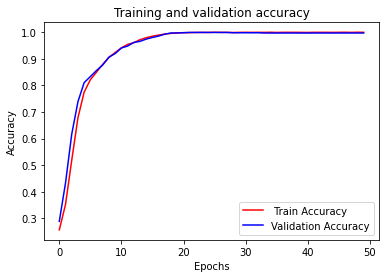

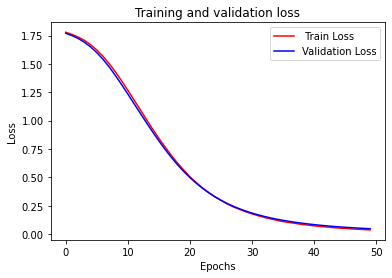

<Figure size 432x288 with 0 Axes>

In [21]:
num_epochs = 50
bs = 32
lr = 1e-5
opt = tf.keras.optimizers.Adam(learning_rate=lr)
#train_ds = df_to_dataset(train_x,train_y,batch_size = bs)
#val_ds = df_to_dataset(val_x,val_y,batch_size = bs)


model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=num_epochs, validation_data=val_ds, batch_size = bs, verbose=2)


import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#Result Visulization
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend([" Train Accuracy", "Validation Accuracy"])

plt.figure()


# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend([" Train Loss", "Validation Loss"])

plt.figure()

In [22]:
model.fit(train_ds,validation_data=val_ds, epochs=20)
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

Epoch 1/20
128/128 [==============================] - 2s 13ms/step - loss: 0.0344 - accuracy: 0.9992 - val_loss: 0.0450 - val_accuracy: 0.9969
Epoch 2/20
128/128 [==============================] - 2s 13ms/step - loss: 0.0318 - accuracy: 0.9995 - val_loss: 0.0426 - val_accuracy: 0.9969
Epoch 3/20
128/128 [==============================] - 2s 13ms/step - loss: 0.0302 - accuracy: 0.9997 - val_loss: 0.0404 - val_accuracy: 0.9969
Epoch 4/20
128/128 [==============================] - 2s 13ms/step - loss: 0.0282 - accuracy: 0.9995 - val_loss: 0.0384 - val_accuracy: 0.9969
Epoch 5/20
128/128 [==============================] - 2s 13ms/step - loss: 0.0265 - accuracy: 0.9992 - val_loss: 0.0365 - val_accuracy: 0.9969
Epoch 6/20
128/128 [==============================] - 2s 13ms/step - loss: 0.0245 - accuracy: 0.9995 - val_loss: 0.0348 - val_accuracy: 0.9969
Epoch 7/20
128/128 [==============================] - 2s 13ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 0.9969